### Rebecca Sharon Kulundu

#  1.Introduction

##  Synopsis

This project analyzes the studio movie industry. Descriptive analytics show that there is a dominant formula for creating high grossing movies. Microsoft can use this infomation to make a data driven choice on what type of content they should produce.

## Objectives

Exploring what types of films are currently doing the best at the box office and translating those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.
To achieve this, the following steps were followed:
* Exploration of data given
* Cleaning the datasits
* Analysis and visualizations

## 2. Previewing data sets

In [3]:
#install libraries
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

%matplotlib inline
import zippedData

In [4]:
#Accessing data in the database
import sqlite3
conn = sqlite3.connect('im.db')
sql_query = """SELECT name FROM sqlite_master WHERE type='table';"""
cursor = conn.cursor()
cursor.execute(sql_query)
print("data list of tables")
print(cursor.fetchall())

data list of tables
[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


In [5]:
# read all the csv files and tsv files with pandas
df_movie_budget = pd.read_csv('tn.movie_budgets.csv')
df_bom_movie_gross= pd.read_csv('bom.movie_gross.csv')
df_review = pd.read_table("rt.reviews.tsv", encoding='unicode_escape' )
df_movie_info= pd.read_table("rt.movie_info.tsv", encoding='unicode_escape')
df_movies= pd.read_csv('tmdb.movies.csv')

In [6]:
#movie_basic analysis
df_movie_basics = pd.read_sql_query("""
SELECT *
FROM movie_basics
LIMIT 10
;""", conn)
df_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [7]:
#movie_ratings analysis
df_movie_ratings = pd.read_sql_query("""
SELECT *
FROM movie_ratings
LIMIT 10
;""", conn)
df_movie_ratings.head()



,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [8]:
#movie_akas analysis
df_movie_akas = pd.read_sql_query("""
SELECT *
FROM movie_akas
LIMIT 10
;""", conn)
df_movie_akas.head()




,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [9]:
#principal analysis
df_principals = pd.read_sql_query("""
SELECT *
FROM principals
LIMIT 10
;""", conn)
df_principals.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [10]:
#Directors analysis
df_directors = pd.read_sql_query("""
SELECT *
FROM directors
LIMIT 10
;""", conn)
df_directors.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [11]:
#Known_for analysis
df_known_for = pd.read_sql_query("""
SELECT *
FROM directors
LIMIT 10
;""", conn)
df_known_for.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [12]:
#persons analysis
df_persons = pd.read_sql_query("""
SELECT *
FROM persons
LIMIT 10
;""", conn)
df_persons.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,None,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,None,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,None,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,None,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,None,"production_designer,art_department,set_decorator"


In [13]:
#writers analysis
df_writers = pd.read_sql_query("""
SELECT *
FROM writers
LIMIT 10
;""", conn)
df_writers.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [14]:
df_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [15]:
df_bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [16]:
df_movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


## 3. Data Ceaning

In [17]:
df_persons.head(3)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,None,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,None,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,None,"miscellaneous,actor,writer"


In [18]:
#checking the data for null entries.
df_persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   person_id           10 non-null     object 
 1   primary_name        10 non-null     object 
 2   birth_year          1 non-null      float64
 3   death_year          0 non-null      object 
 4   primary_profession  10 non-null     object 
dtypes: float64(1), object(4)
memory usage: 528.0+ bytes


In [19]:
df_persons.isna().sum()

person_id              0
primary_name           0
birth_year             9
death_year            10
primary_profession     0
dtype: int64

In [20]:
df_persons.drop(columns=['birth_year', 'death_year',  'primary_profession' ], inplace=True)

In [21]:
df_persons.shape

(10, 2)

In [22]:
# check for duplicates in the data

df_persons.duplicated().sum()

0

The data has no duplicates

In [23]:
df_movie_budget.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


In [24]:
df_movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [25]:
# removing the $ and , from the columns

df_movie_budget['production_budget'] = df_movie_budget['production_budget'].str.replace('$','')
df_movie_budget['production_budget'] = df_movie_budget['production_budget'].str.replace(',', '')
df_movie_budget['domestic_gross'] = df_movie_budget['domestic_gross'].str.replace('$','')
df_movie_budget['domestic_gross'] = df_movie_budget['domestic_gross'].str.replace(',', '')
df_movie_budget['worldwide_gross'] = df_movie_budget['worldwide_gross'].str.replace('$','')
df_movie_budget['worldwide_gross'] = df_movie_budget['worldwide_gross'].str.replace(',', '')

In [26]:
# converting the columns to integers
df_movie_budget['production_budget'] = df_movie_budget['production_budget'].astype('int64')
df_movie_budget['domestic_gross'] = df_movie_budget['domestic_gross'].astype('int64')
df_movie_budget['worldwide_gross'] = df_movie_budget['worldwide_gross'].astype('int64')

In [27]:
# checking if the data has missing values

df_movie_budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

The dataset has no null values

In [28]:
# checking for duplicate values

df_movie_budget.duplicated(['movie', 'release_date']).sum()

0

In [29]:
df_movie_budget.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350


In [30]:
df_movies.head(3)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368


In [31]:
# checking the data types of the columns
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [32]:
# checking if the data has missing values

df_movies.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [33]:
# checking for duplicate values

df_movies.duplicated(subset=['title', 'release_date']).sum()

1027

In [34]:
# dropping the duplicates row

df_movies.drop_duplicates(subset = ['title', 'release_date'], inplace=True)

In [35]:
df_movies.shape

(25490, 10)

In [36]:
# previewing the data

df_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [37]:
# checking for missing values

df_movie_basics.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    3
genres             0
dtype: int64

In [38]:
# dropping runtime minutes column

df_movie_basics.drop(columns='runtime_minutes', inplace=True)

In [39]:
df_movie_basics.duplicated(subset= ['primary_title', 'start_year']).sum()

0

In [40]:
df_movie_basics.shape

(10, 5)

### 4. Merging Relevant  Datasets

In [41]:
# renaming the column

movie_basics_ratings = pd.read_sql("""SELECT genres, averagerating,numvotes
                                FROM movie_basics
                                JOIN movie_ratings
                                USING (movie_id);""", conn)

In [42]:
movie_basics_ratings

,genres,averagerating,numvotes
0,"Action,Crime,Drama",7.0,77
1,"Biography,Drama",7.2,43
2,Drama,6.9,4517
3,"Comedy,Drama",6.1,13
4,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...
73851,Documentary,6.2,6
73852,"Drama,Family",8.7,136
73853,Documentary,8.5,8
73854,None,6.6,5


In [43]:
merge_1 = movie_basics_ratings.join(df_movie_budget)
merge_1

,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Action,Crime,Drama",7.0,77,1.0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,"Biography,Drama",7.2,43,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,Drama,6.9,4517,3.0,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,"Comedy,Drama",6.1,13,4.0,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,"Comedy,Drama,Fantasy",6.5,119,5.0,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...,...,...,...
73851,Documentary,6.2,6,NaN,NaN,NaN,NaN,NaN,NaN
73852,"Drama,Family",8.7,136,NaN,NaN,NaN,NaN,NaN,NaN
73853,Documentary,8.5,8,NaN,NaN,NaN,NaN,NaN,NaN
73854,None,6.6,5,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
merge_1.isna().sum()

genres                 804
averagerating            0
numvotes                 0
id                   68074
release_date         68074
movie                68074
production_budget    68074
domestic_gross       68074
worldwide_gross      68074
dtype: int64

In [45]:
merge_1.dropna(subset=['genres','id','release_date','movie','production_budget','domestic_gross','worldwide_gross'] , inplace=True)

In [46]:
merge_1

,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Action,Crime,Drama",7.0,77,1.0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,"Biography,Drama",7.2,43,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,Drama,6.9,4517,3.0,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,"Comedy,Drama",6.1,13,4.0,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,"Comedy,Drama,Fantasy",6.5,119,5.0,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...,...,...,...
5777,"Comedy,Drama,Horror",4.3,43,78.0,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,"Drama,Family",8.1,10,79.0,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,"Comedy,Drama",7.0,13,80.0,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,"Drama,Romance",5.0,36,81.0,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


###  5.Exploratory Data Analysis (EDA)

#### 1. What is the relationship between movie ratings and specific movies?

In [47]:
movie_gross_ratings = merge_1.sort_values(by = ['numvotes', 'averagerating'],ascending=(False, False)).head(10)
movie_gross_ratings = merge_1.sort_values('averagerating',ascending=False).reset_index(drop=True)

In [48]:
# movies with the highest ratings

movie_gross_ratings.loc[:,['movie','averagerating','genres']]

,movie,averagerating,genres
0,Die Hard 2,10.0,Documentary
1,The Happening,10.0,"Comedy,Drama"
2,ParaNorman,9.8,Action
3,Sleepy Hollow,9.8,Documentary
4,Monkeybone,9.7,"Comedy,Documentary,Sport"
...,...,...,...
5738,Without Men,1.4,"Drama,Sci-Fi"
5739,Wild Target,1.4,Drama
5740,We Are Marshall,1.4,Thriller
5741,Open Secret,1.2,"Action,Sci-Fi"


In [49]:
movie_gross_ratings_high =merge_1.sort_values('worldwide_gross', ascending = False).head(10)
movie_gross_ratings_high.reset_index(drop=True)

,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Action,Crime,Drama",7.0,77,1.0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,"Comedy,Crime,Drama",7.4,14,43.0,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09
2,"Horror,Thriller",4.1,32,6.0,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09
3,"Adventure,Animation,Comedy",8.1,263,7.0,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09
4,"Comedy,Crime",5.7,22148,67.0,"Apr 3, 2015",Furious 7,190000000.0,353007020.0,1.518723e+09
5,Documentary,7.4,35,27.0,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09
6,"Comedy,Drama",6.1,13,4.0,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
7,"Adventure,Drama,Romance",6.1,37886,42.0,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1.348258e+09
8,"Documentary,Music",9.3,42,61.0,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09
9,"Comedy,Drama,Fantasy",6.5,119,5.0,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [50]:
# movies with the highest gross
movie_gross_ratings_high.loc[:,['movie','worldwide_gross']]


,movie,worldwide_gross
0,Avatar,2.776345e+09
42,Titanic,2.208208e+09
5,Star Wars Ep. VII: The Force Awakens,2.053311e+09
6,Avengers: Infinity War,2.048134e+09
66,Furious 7,1.518723e+09
26,The Avengers,1.517936e+09
3,Avengers: Age of Ultron,1.403014e+09
41,Black Panther,1.348258e+09
260,Harry Potter and the Deathly Hallows: Part II,1.341693e+09
4,Star Wars Ep. VIII: The Last Jedi,1.316722e+09


<AxesSubplot:xlabel='movie', ylabel='ratings'>

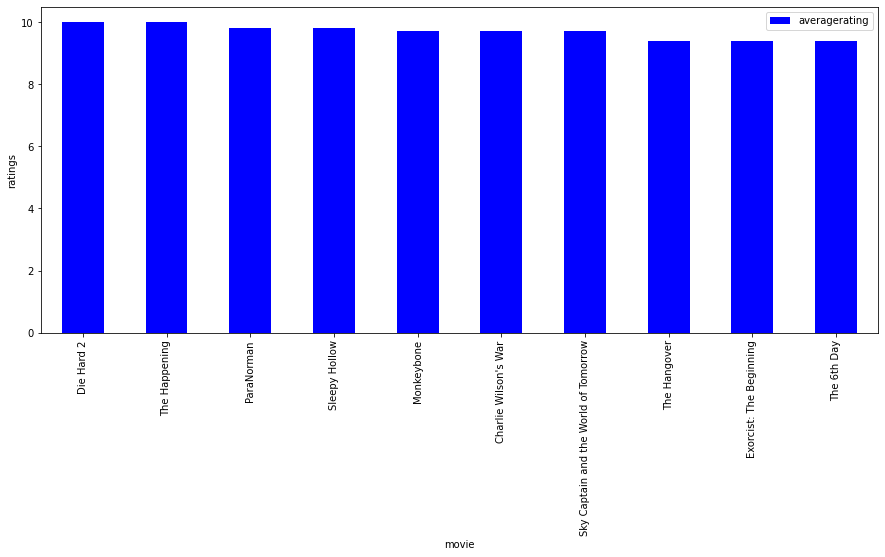

In [51]:
movie_gross_ratings.head(10).plot(kind='bar', x='movie', y='averagerating', ylabel='ratings', figsize=(15,6), color='blue')

<AxesSubplot:xlabel='movie', ylabel='gross'>

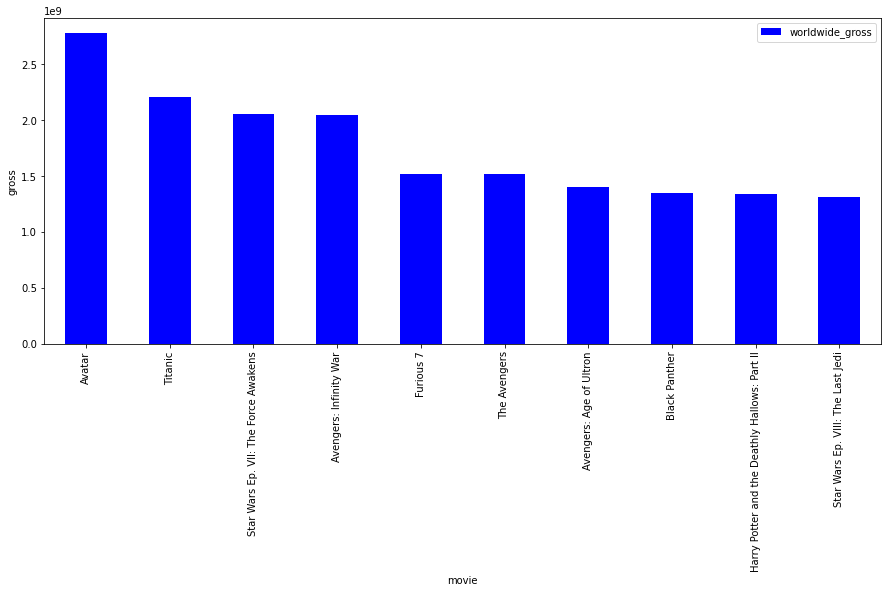

In [52]:
movie_gross_ratings_high.head(20).plot(kind='bar', x='movie', y='worldwide_gross', figsize=(15,6), ylabel='gross', color='blue')

From the above data , movies with highest gross and highest rating include:
    
* Avatar
* Titanic
* Star Wars Ep. VII: The Force Awakens
* Avengers: Infinity War
* Furious 
* The Avengers
* Avengers: Age of Ultron
* Black Panther
* Harry Potter and the Deathly Hallows: Part II
* Star Wars Ep. VIII: The Last Jedi

#### 2. What is the correlation between worldwidegross and averagerating?

<AxesSubplot:xlabel='averagerating', ylabel='worldwide_gross'>

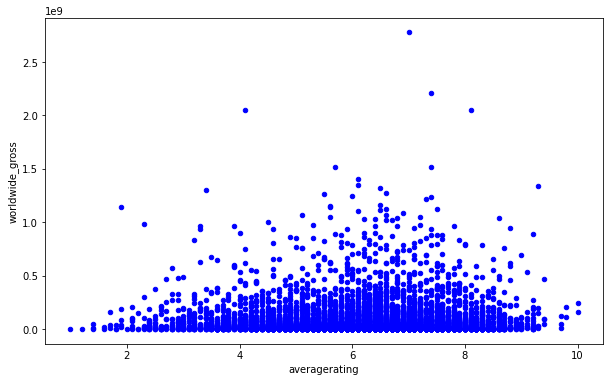

In [53]:
merge_1.plot(kind='scatter', x='averagerating', y='worldwide_gross',  figsize=(10,6), color='blue')

From the above plot, it is possible to deduce that ratings affect revenue. It can be noted that movies with high ratings have a high revenue.

#### 3. What genres of movies have the highest grosssing movies?

In [54]:
top100_grossing = merge_1.sort_values('worldwide_gross', ascending = False).head(100)

In [55]:
top100_grossing

,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Action,Crime,Drama",7.0,77,1.0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
42,"Comedy,Crime,Drama",7.4,14,43.0,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09
5,"Horror,Thriller",4.1,32,6.0,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09
6,"Adventure,Animation,Comedy",8.1,263,7.0,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09
66,"Comedy,Crime",5.7,22148,67.0,"Apr 3, 2015",Furious 7,190000000.0,353007020.0,1.518723e+09
...,...,...,...,...,...,...,...,...,...
99,"Drama,Romance",4.1,1571,100.0,"Aug 5, 2016",Suicide Squad,175000000.0,325100054.0,7.460599e+08
52,"Action,Adventure,Sci-Fi",7.0,539338,53.0,"Jun 21, 2013",Monsters University,200000000.0,268488329.0,7.435883e+08
159,"Drama,Thriller",6.9,35,60.0,"May 15, 2003",The Matrix Reloaded,150000000.0,281553689.0,7.385769e+08
100,"Comedy,Drama,Romance",6.8,45181,1.0,"May 29, 2009",Up,175000000.0,293004164.0,7.314634e+08


In [56]:
# accessing the individual genre element per row

movie_genres = []

for genre in top100_grossing['genres']:
    movie_genres.append(genre.split(','))

In [57]:
movie_genres

[['Action', 'Crime', 'Drama'],
 ['Comedy', 'Crime', 'Drama'],
 ['Horror', 'Thriller'],
 ['Adventure', 'Animation', 'Comedy'],
 ['Comedy', 'Crime'],
 ['Documentary'],
 ['Comedy', 'Drama'],
 ['Adventure', 'Drama', 'Romance'],
 ['Documentary', 'Music'],
 ['Comedy', 'Drama', 'Fantasy'],
 ['Horror'],
 ['Action', 'Crime', 'Thriller'],
 ['Drama'],
 ['Biography'],
 ['Action', 'Drama'],
 ['Adventure', 'Comedy', 'Drama'],
 ['Crime', 'Drama', 'History'],
 ['Drama', 'Horror', 'Sci-Fi'],
 ['Drama'],
 ['Action', 'Animation', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Drama', 'Thriller'],
 ['Action', 'Crime', 'Drama'],
 ['Adventure', 'Comedy', 'Romance'],
 ['Drama'],
 ['Drama'],
 ['Thriller'],
 ['Horror'],
 ['Biography', 'Drama'],
 ['Documentary'],
 ['Documentary'],
 ['Adventure', 'Comedy', 'Family'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy', 'Drama'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Horror'],
 ['Comedy'],
 ['Drama', 'Romance'],
 ['Action', 'Mystery'

In [58]:
# accessing all genre elements in the rows

movie_genres_list = []

for data in movie_genres:
    for item in data:
        movie_genres_list.append(item)

In [59]:
# accessing all the unique genres in the rows

unique_genres = []

for item in movie_genres_list:
    if item not in unique_genres:
        unique_genres.append(item)

In [60]:
# finding how many films were made per genre

m_count = Counter(movie_genres_list)

In [61]:
m_count

Counter({'Action': 17,
         'Crime': 12,
         'Drama': 49,
         'Comedy': 26,
         'Horror': 11,
         'Thriller': 14,
         'Adventure': 13,
         'Animation': 5,
         'Documentary': 9,
         'Romance': 12,
         'Music': 1,
         'Fantasy': 4,
         'Biography': 7,
         'History': 3,
         'Sci-Fi': 7,
         'Family': 5,
         'Mystery': 6,
         'War': 1})

In [62]:
genre = []
count = []

for key, values in m_count.items():
    genre.append(key)
    count.append(values)

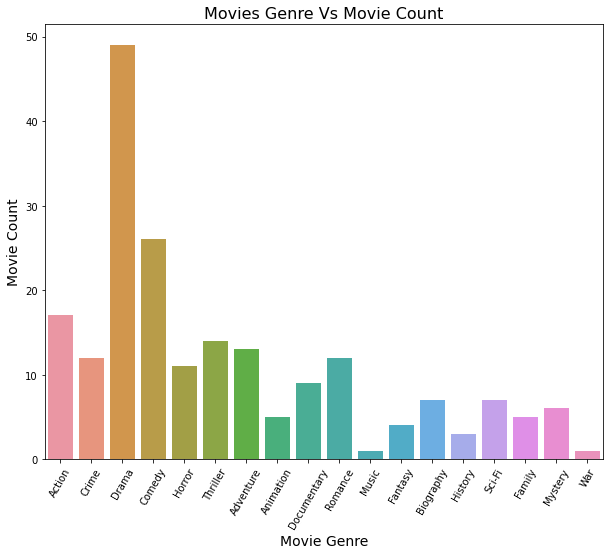

In [63]:
# plotting the data above

fig, ax = plt.subplots(figsize=(10,8))

x = genre
y = count

ax = sns.barplot(x = x, y = y, ax = ax)

ax.set_title('Movies Genre Vs Movie Count', fontsize=16)
ax.set_xlabel("Movie Genre",fontsize=14)
ax.set_ylabel("Movie Count", fontsize=14);

ax.set_xticklabels(labels = x, rotation = 60)
fig.savefig('Movies Genres Vs Movie Count.png');

It can be noted that the among the top 100 highest grossing , the genres with the highest movie counts are :

1. Drama - 49
2. Comedy -26
3. Action - 14


#### 4. What is the best time to release a movie?

In [64]:
merge_1.head(2)

,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Action,Crime,Drama",7.0,77,1.0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,"Biography,Drama",7.2,43,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09


In [65]:
# convert release date to date-time

merge_1['release_date'] = pd.to_datetime(merge_1['release_date'])


In [66]:
merge_1.head()

,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Action,Crime,Drama",7.0,77,1.0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,"Biography,Drama",7.2,43,2.0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,Drama,6.9,4517,3.0,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,"Comedy,Drama",6.1,13,4.0,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,"Comedy,Drama,Fantasy",6.5,119,5.0,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [67]:
# accessing the release month of the movies and creating a new column for it

merge_1['release_month'] = merge_1['release_date'].dt.month

In [68]:
merge_1['release_month'].head(3)

0    12
1     5
2     6
Name: release_month, dtype: int64

In [69]:
# retrieving the mean gross of the movies per month

month_gross_mean = merge_1.groupby('release_month')['worldwide_gross'].mean()
month_gross_mean

release_month
1     4.635906e+07
2     7.154453e+07
3     8.097950e+07
4     6.006377e+07
5     1.610152e+08
6     1.399312e+08
7     1.422432e+08
8     6.112645e+07
9     4.645887e+07
10    4.933354e+07
11    1.360215e+08
12    1.007205e+08
Name: worldwide_gross, dtype: float64

In [70]:
# converting the above to a dataframe

monthly_mean_gross = pd.DataFrame(month_gross_mean)
monthly_mean_gross.reset_index(drop=False, inplace=True)

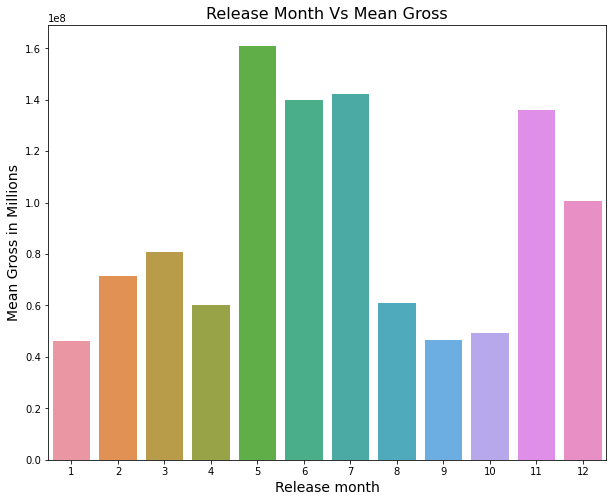

In [71]:
# plotting the data above

fig, ax = plt.subplots(figsize=(10,8))

x = monthly_mean_gross['release_month']
y = monthly_mean_gross['worldwide_gross']

ax = sns.barplot(x = x, y = y, ax = ax)

ax.set_title('Release Month Vs Mean Gross', fontsize=16)
ax.set_xlabel("Release month",fontsize=14)
ax.set_ylabel("Mean Gross in Millions", fontsize=14);

#ax.set_xticklabels(labels = x)
fig.savefig('Release Month Vs Mean Gross.png');

It can be noted that May, June , July and November have the highest gross. This means movies that were released during these months grossed more. These months can be adopted by Microsoft for when they release their movies.

# Conclusions

1. High rated movies gross higher, hence high profit margins.
2. Action, drama and comedy genre of movies are the best to venture into since they  gross the highest and have a high count of numbers.
3. Movies released in May, June, July and November grossed the highest as compared to the other months.